In [156]:
import pandas as pd
dataset = pd.read_csv("flavors_of_cacao.csv")
dataset

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [157]:
dataset.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [158]:
print("Yes, there are missing values")
print("There is one missing value in BeanType Column")

Yes, there are missing values
There is one missing value in BeanType Column


In [159]:
dataset = dataset.dropna()

In [160]:
dataset.drop_duplicates()
dataset

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [161]:
dataset.shape[0]

1793

In [162]:
dataset.columns.values

array(['Company\xa0\n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'], dtype=object)

In [163]:
print("there are", dataset['Company\xa0\n(Maker-if known)'].unique().size, "unique companies")

there are 416 unique companies


In [164]:
dataset['Review\nDate'].dtype


dtype('int64')

In [165]:
print("there are", dataset.loc[dataset['Review\nDate'] == 2013].shape[0], "reviews in 2013")

there are 184 reviews in 2013


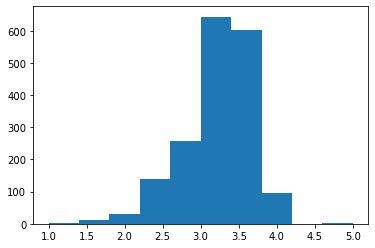

In [166]:
import matplotlib.pyplot as plt
plt.hist(dataset['Rating'])
plt.show()

In [167]:
x = dataset['Cocoa\nPercent'].str.rstrip('%').astype('float') / 100.0

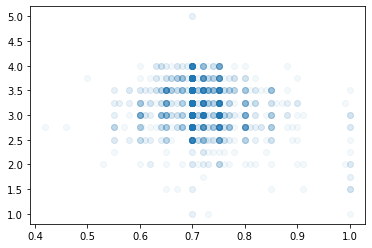

there is no correlation between cocoa percent and the ratings


In [169]:
plt.scatter(x, dataset['Rating'], alpha = 0.05)
plt.show()
print("there is no correlation between cocoa percent and the ratings")

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalizedRatings = scaler.fit_transform(dataset.iloc[:, 6:7])
normalizedRatings

array([[ 1.18135642],
       [-0.9127336 ],
       [-0.3892111 ],
       ...,
       [ 0.65783391],
       [ 0.13431141],
       [-0.3892111 ]])

In [171]:
dataset.groupby('Company\xa0\n(Maker-if known)')['Rating'].agg(['mean']).sort_values(by='mean', ascending=False)

,mean
Company (Maker-if known),
Tobago Estate (Pralus),4.000000
Heirloom Cacao Preservation (Zokoko),3.875000
Ocelot,3.875000
Amedei,3.846154
Matale,3.812500
...,...
Majani,2.000000
Love Bar,2.000000
Callebaut,1.875000


In [143]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encodedcolumns = encoder.fit_transform(dataset[["Company\xa0\n(Maker-if known)","Company\nLocation"]])
dataset

<ipython-input-143-63cd5ea77eba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[["Company\xa0\n(Maker-if known)","Company\nLocation"]] = encoder.fit_transform(dataset[["Company\xa0\n(Maker-if known)","Company\nLocation"]])
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,0.0,Agua Grande,1876,2016,0.63,18.0,3.75,,Sao Tome
1,0.0,Kpime,1676,2015,0.70,18.0,2.75,,Togo
2,0.0,Atsane,1676,2015,0.70,18.0,3.00,,Togo
3,0.0,Akata,1680,2015,0.70,18.0,3.50,,Togo
4,0.0,Quilla,1704,2015,0.70,18.0,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,410.0,Peru,647,2011,0.70,3.0,3.75,,Peru
1791,410.0,Congo,749,2011,0.65,3.0,3.00,Forastero,Congo
1792,410.0,Kerala State,749,2011,0.65,3.0,3.50,Forastero,India
1793,410.0,Kerala State,781,2011,0.62,3.0,3.25,,India
